# 2022/2024 Q2 Suppor Vector Machine .

2. (a) Read the "breast_cancer" data from sklearn library and build the Support Vector Machine (SVM) model to classify tumors into malignant (cancerous) orbenign (non-cancerous) using the features obtained from several cell images.

i. You are requested to build an SVM classifier using linear SVM to fit the best model.

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


data = pd.read_csv('breast_cancer.csv')
data.head(10)

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,5-Mar,True,2,left,right_up,False,recurrence-events
5,50-59,premefalse,25-29,5-Mar,False,2,right,left_up,True,false-recurrence-events
6,50-59,ge40,40-44,0-2,False,3,left,left_up,False,false-recurrence-events
7,40-49,premefalse,14-Oct,0-2,False,2,left,left_up,False,false-recurrence-events
8,40-49,premefalse,0-4,0-2,False,2,right,right_low,False,false-recurrence-events
9,40-49,ge40,40-44,15-17,True,2,right,left_up,True,false-recurrence-events


In [10]:
data.isnull().sum()
data.fillna(data.mean(numeric_only=True), inplace=True)
data.isnull().sum()

age             0
mefalsepause    0
tumor-size      0
inv-falsedes    0
falsede-caps    8
deg-malig       0
breast          0
breast-quad     1
irradiat        0
class           0
dtype: int64

In [11]:
X = data.drop('class', axis=1)
y = data['class']

In [22]:
data.columns

Index(['age', 'mefalsepause', 'tumor-size', 'inv-falsedes', 'falsede-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat', 'class'],
      dtype='object')

In [23]:
X = pd.get_dummies(X, drop_first=True)


#encode target labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)



In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the SVM model

In [15]:
from sklearn.pipeline import Pipeline

svm_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

svm_linear.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

# (ii). Display the model accuracy, precision and recall.

Accuracy : 0.7272727272727273
Precision: 0.46153846153846156
Recall   : 0.42857142857142855


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.46      0.43      0.44        14

    accuracy                           0.73        55
   macro avg       0.64      0.63      0.63        55
weighted avg       0.72      0.73      0.72        55



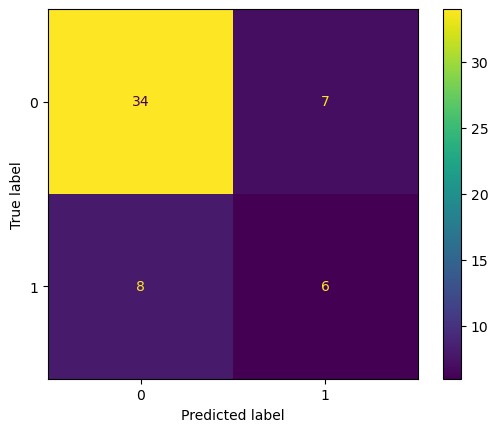

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix, ConfusionMatrixDisplay


y_pred = svm_linear.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)

print('\n')
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# (b) Verify model accuracy when applying the normalization technique on the training data.

In [17]:
scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train)  # fit only on training data
X_test_norm = scaler.transform(X_test)        # apply same scaling to test data


In [18]:
# Train Linear SVM on normalized data

svm_linear_norm = SVC(kernel='linear')
svm_linear_norm.fit(X_train_norm, y_train)


SVC(kernel='linear')

In [19]:
#Predict and calculate accuracy

y_pred_norm = svm_linear_norm.predict(X_test_norm)

accuracy_norm = accuracy_score(y_test, y_pred_norm)
print("Accuracy after normalization:", accuracy_norm)


Accuracy after normalization: 0.7272727272727273


In [20]:
# First 5 records
print("Expected vs Predicted (first 5 records):")
for i in range(5):
    print(f"Record {i+1}: Expected = {y_test[i]}, Predicted = {y_pred[i]}")


Expected vs Predicted (first 5 records):
Record 1: Expected = 0, Predicted = 1
Record 2: Expected = 0, Predicted = 0
Record 3: Expected = 0, Predicted = 0
Record 4: Expected = 1, Predicted = 0
Record 5: Expected = 0, Predicted = 0
